In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
import subprocess
%matplotlib inline

##### some useful sites:
* http://research.jisao.washington.edu/data_sets/nco/
* http://nco.sourceforge.net/nco.html

### Start from Dec 2014

In [2]:
#for yr in ('15','16','17'): # years
yr='15'
fdec=glob.glob('/results/SalishSea/nowcast-green/*dec'+str(int(yr))-1+'/SalishSea_1d*_grid_T.nc')
fjan=glob.glob('/results/SalishSea/nowcast-green/*jan'+yr+'/SalishSea_1d*_grid_T.nc')
ffeb=glob.glob('/results/SalishSea/nowcast-green/*feb'+yr+'/SalishSea_1d*_grid_T.nc')
fmar=glob.glob('/results/SalishSea/nowcast-green/*mar'+yr+'/SalishSea_1d*_grid_T.nc')
fapr=glob.glob('/results/SalishSea/nowcast-green/*apr'+yr+'/SalishSea_1d*_grid_T.nc')
fmay=glob.glob('/results/SalishSea/nowcast-green/*may'+yr+'/SalishSea_1d*_grid_T.nc')
fjun=glob.glob('/results/SalishSea/nowcast-green/*jun'+yr+'/SalishSea_1d*_grid_T.nc')
fjul=glob.glob('/results/SalishSea/nowcast-green/*jul'+yr+'/SalishSea_1d*_grid_T.nc')
faug=glob.glob('/results/SalishSea/nowcast-green/*aug'+yr+'/SalishSea_1d*_grid_T.nc')
fsep=glob.glob('/results/SalishSea/nowcast-green/*sep'+yr+'/SalishSea_1d*_grid_T.nc')
foct=glob.glob('/results/SalishSea/nowcast-green/*oct'+yr+'/SalishSea_1d*_grid_T.nc')
fnov=glob.glob('/results/SalishSea/nowcast-green/*nov'+yr+'/SalishSea_1d*_grid_T.nc')

In [3]:
fDJF=fdec+fjan+ffeb
fMAM=fmar+fapr+fmay
fJJA=fjun+fjul+faug
fSON=fsep+foct+fnov

In [4]:
# index 21 is 28.229916 m
foutDJF='/data/vdo/MEOPAR/for-devin/meanDJF_0-30m_20'+yr+'.nc'
%time subprocess.check_output('ncra -v votemper,vosaline -d deptht,,21,1 '+' '.join(fDJF)+' '+foutDJF,shell=True)

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 56.5 s


b''

In [5]:
# index 21 is 28.229916 m
foutMAM='/data/vdo/MEOPAR/for-devin/meanMAM_0-30m_20'+yr+'.nc'
%time subprocess.check_output('ncra -v votemper,vosaline -d deptht,,21,1 '+' '.join(fMAM)+' '+foutMAM,shell=True)

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 52.2 s


b''

In [6]:
# index 21 is 28.229916 m
foutJJA='/data/vdo/MEOPAR/for-devin/meanJJA_0-30m_20'+yr+'.nc'
%time subprocess.check_output('ncra -v votemper,vosaline -d deptht,,21,1 '+' '.join(fJJA)+' '+foutJJA,shell=True)

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 57.4 s


b''

In [7]:
# index 21 is 28.229916 m
foutSON='/data/vdo/MEOPAR/for-devin/meanSON_0-30m_20'+yr+'.nc'
%time subprocess.check_output('ncra -v votemper,vosaline -d deptht,,21,1 '+' '.join(fSON)+' '+foutSON,shell=True)

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 1min 45s


b''

### Now combine seasonal averages in 1 file
* there maybe be a way to create the averages and combine them all in one step, maybe using hyperslabs and/or subcycle features, but this may require even day divisions (months do not have the same number of days
* you can only concatenate along the "record dimension", typically unlimited dimension. If you download from ERDDAP, you have to make time a record dimesion

In [8]:
fout='/data/vdo/MEOPAR/for-devin/seasonal-30_20'+yr+'.nc'
flist=foutDJF+' '+foutMAM+' '+foutJJA+' '+foutSON
%time subprocess.check_output('ncrcat '+flist+' '+fout,shell=True)

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 6.8 s


b''

In [9]:
f=nc.Dataset(fout)

In [10]:
f.variables.keys()

odict_keys(['bounds_lat', 'bounds_lon', 'deptht', 'deptht_bounds', 'nav_lat', 'nav_lon', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vosaline', 'votemper'])

In [11]:
f.variables['deptht'][-1]

28.229916

In [12]:
[dt.datetime(1900,1,1)+dt.timedelta(seconds=ii) for ii in f.variables['time_centered']]

[datetime.datetime(2015, 1, 15, 0, 0),
 datetime.datetime(2015, 4, 16, 0, 0),
 datetime.datetime(2015, 7, 17, 0, 0),
 datetime.datetime(2015, 10, 16, 12, 0)]

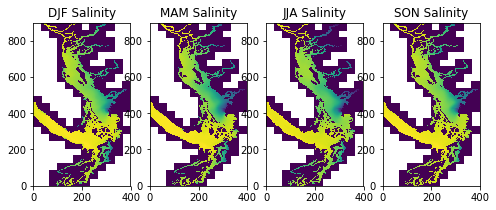

In [13]:
fig,ax=plt.subplots(1,4,figsize=(8,3))
ax[0].pcolormesh(f.variables['vosaline'][0,0,:,:])
ax[0].set_title('DJF Salinity')
ax[1].pcolormesh(f.variables['vosaline'][1,0,:,:])
ax[1].set_title('MAM Salinity')
ax[2].pcolormesh(f.variables['vosaline'][2,0,:,:])
ax[2].set_title('JJA Salinity')
ax[3].pcolormesh(f.variables['vosaline'][3,0,:,:])
ax[3].set_title('SON Salinity')

In [14]:
f.close()

In [ ]:
f = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2015.nc', 'a')

In [ ]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [ ]:
mask = mesh.variables['e3t_0'][:,:22,:,:]

In [ ]:
mask = np.ma.masked_array(mask, mask = 1- mesh.variables['tmask'][:,:22,:,:])

In [ ]:
averaged = np.sum((f.variables['votemper'][:] * mask), axis=1) / np.sum(mask, axis = 1)
averaged.shape

In [ ]:
temps = f.createVariable('votemperoverdepth', 'f4', ('time_counter', 'y', 'x'))

In [ ]:
temps[:] = averaged

In [ ]:
sals = f.createVariable('vosalineoverdepth', 'f4', ('time_counter', 'y', 'x'))

In [ ]:
averaged2 = np.sum((f.variables['vosaline'][:] * mask), axis=1) / np.sum(mask, axis = 1)
averaged2.shape

In [ ]:
sals[:] = averaged2

In [ ]:
f.variables['vosalineoverdepth']

In [ ]:
f.variables['votemperoverdepth']

In [ ]:
f.close()